0# Problem Statement


To predict whether a bank should give person a credit card or not.



# Data Description

ID:-  A unique element for each of the customer.

Age:- Age of the person having account in bank or the customer age.

Experience:- Number of years they have experience in their field.

Income:- Tells the total income of a person.

ZIP Code:- It reperesent the zonal code for a bank. Bank in different zones have different ZIP Code.

Family:- It represent the total number of members in their family.

CCAvg:- It tells the cash credit average a person can take form bank.

Education:- A numerical data which tells the education of a person in years.

Mortgage:- A legal document signed during the loan. It tell us the number of time a person took loan from bank.

Personal Loan:- Number of time a person took loan from bank for personal use. In this dataset it is a categorical variable. Its                 value is either 0 or 1

Securities Account:- It represent the number of securities account a person have in a bank. It is also a categorical type of                        variable having values 0 or 1.

CD Account:- It represent the number of CD account a person have in a bank. It is also a categorical type of                                variable having values 0 or 1.

Online:- It tell us whether a person do some online transaction or not. Its a categorical type variable with values 0 or 1.

CreditCard:- Its is my target variable which tell us whether a person is having a credit card or not.  

# Importing Libraries

In [3]:
import pandas as pd  # for reading file
from matplotlib import pyplot as plt  # for making plots
from sklearn.tree import DecisionTreeClassifier  # for using Decision tree
from sklearn.model_selection import train_test_split  # for splitting our dataset into test and train
from sklearn import metrics   # used in determining the accuracy
from sklearn.ensemble import RandomForestClassifier   #for random forest

Reading Dataset 

In [4]:
df=pd.read_csv('C:\\Users\\abc\\Downloads\\bank.csv') 

# EDA

In [6]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [7]:
df.shape

(5000, 14)

In [8]:
df.isnull().sum()   #checking null values

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [9]:
df.describe()    #to check mean, median, min and max terms.

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


As in all columns there is not a big difference between the mean and 50% (i.e median) which implies that their are very less outliars in dataset. 

In [10]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [12]:
df.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


Corr command tell us the realtion of different variables with each other. The value of correlation varies from [-1,1]. 

In [85]:
df.CreditCard.value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

Tell us the number of people having credit card or not

# Changing columns names

In [6]:
df.columns=['ID','Age', 'Experience','Income' ,'ZIP_Code','Family','CCAvg','Education','Mortgage','Personal_Loan','Securities_Account','CD_Account','Online','CreditCard']

Now we need to fetch our features that we can pass to our decision tree to train our model.

# Plots

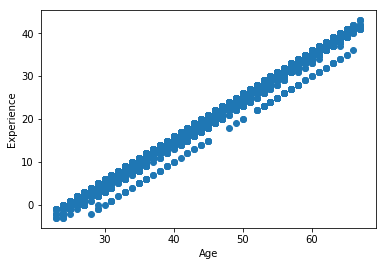

In [29]:
plt.scatter(df.Age,df.Experience)
plt.xlabel('Age');
plt.ylabel('Experience');

This graph shows a linear relationship between two highly corealted variables. So from both of them only one can be passed during the training of the model.

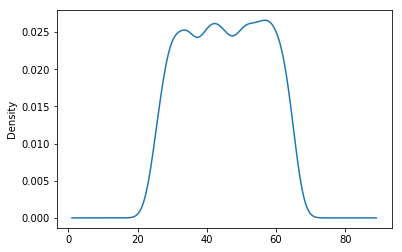

In [40]:
df.Age.plot.density()

From this we get that Age column in my dataset is of multi mode type and most of the ages lies between 25 to 60

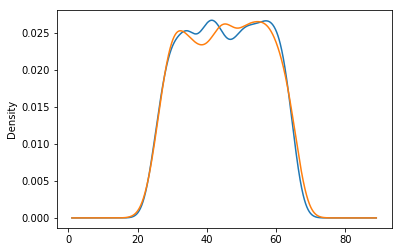

In [44]:
df[df.CreditCard==0].Age.plot.density()
df[df.CreditCard==1].Age.plot.density()

From this graph we get that more number of people at age of 40-45(aprrox.) does not have credit card. 

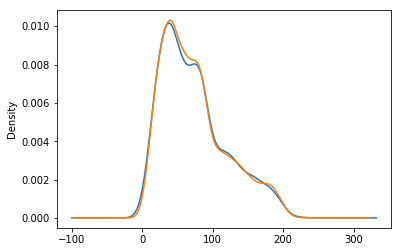

In [55]:
df[df.CreditCard==1].Income.plot.density()
df[df.CreditCard==0].Income.plot.density()

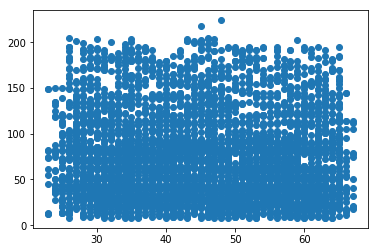

In [51]:
plt.scatter(df.Age,df.Income)

As from both of the graph drawn above we can get that there is no relation between age and income and very few people has income greater than 200.


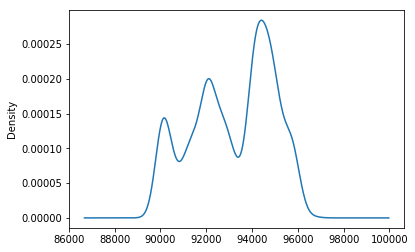

In [84]:
df[df.ZIP_Code>80000].ZIP_Code.plot.density()

From this we get the infrence that more number of people are there having ZIP Code >98000 and data is again multi modal with respect to ZIP Code

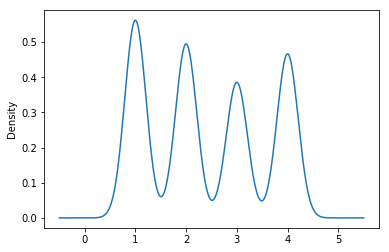

In [87]:
df.Family.plot.density()

Data is multi mode and more number of people are there who are single.

In [88]:
df[df.Family==1].CreditCard.value_counts()

0    1062
1     410
Name: CreditCard, dtype: int64

In [90]:
df[df.Family==2].CreditCard.value_counts()

0    893
1    403
Name: CreditCard, dtype: int64

In [91]:
df[df.Family==3].CreditCard.value_counts()

0    719
1    291
Name: CreditCard, dtype: int64

In [92]:
df[df.Family==4].CreditCard.value_counts()

0    856
1    366
Name: CreditCard, dtype: int64

By calculating the probabilities there are less chances that single person will buy a credit card on comparison with other.

Text(0, 0.5, 'CCAvg')

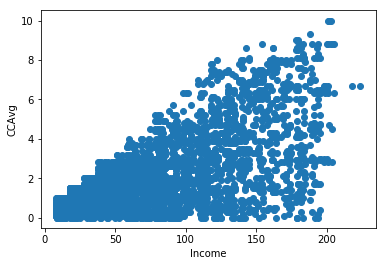

In [97]:
plt.scatter(df.Income,df.CCAvg)
plt.xlabel("Income")
plt.ylabel("CCAvg")

There exist a linear relation between income and CCavg. People having Income less than 100 have CCAvg less than 6.

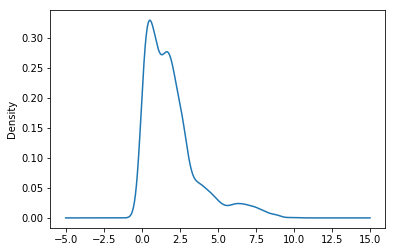

In [100]:
df.CCAvg.plot.density()

Data is again mullti mode w.r.t CCAvg nd maximum number of peole have CCAvg between (0,2)

In [101]:
df.Education.value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [17]:
df[(df.Mortgage==0) & (df.CreditCard==1)].CreditCard.value_counts()


1    1023
Name: CreditCard, dtype: int64

In [111]:
df[(df.Education==1) & (df.CreditCard==)].CreditCard.value_counts()

1    633
Name: CreditCard, dtype: int64

In [14]:
df[(df.Education==3) & (df.CreditCard==0)].CreditCard.value_counts()

0    1064
Name: CreditCard, dtype: int64

In [113]:
df[(df.Education==3) & (df.CreditCard==1)].CreditCard.value_counts()

1    437
Name: CreditCard, dtype: int64

Different line will give us different counts of people having credit card nd their education level.

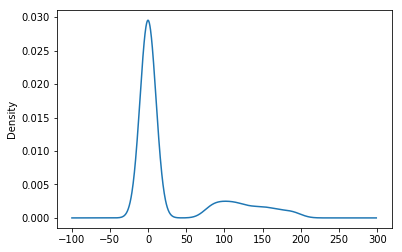

In [120]:
df[df.Mortgage<200].Mortgage.plot.density()

Most of the people in dataset have Mortgage=0 and few of them have some varied numbers.

In [19]:
df[df.Mortgage==0!].CreditCard.value_counts()

SyntaxError: invalid syntax (<ipython-input-19-d6e23e663f15>, line 1)

People having Mortgage equal to 0 have almost 50% chance of having credit card

In [126]:
df.Personal_Loan.value_counts()

0    4520
1     480
Name: Personal_Loan, dtype: int64

In [128]:
df[(df.Personal_Loan==0) & (df.CreditCard==0)].CreditCard.value_counts()

0    3193
Name: CreditCard, dtype: int64

In [129]:
df[(df.Personal_Loan==0) & (df.CreditCard==1)].CreditCard.value_counts()

1    1327
Name: CreditCard, dtype: int64

In [130]:
df[(df.Personal_Loan==1) & (df.CreditCard==0)].CreditCard.value_counts()

0    337
Name: CreditCard, dtype: int64

In [131]:
df[(df.Personal_Loan==1) & (df.CreditCard==1)].CreditCard.value_counts()

1    143
Name: CreditCard, dtype: int64

From these value we get that most of the person having credit card don't have personal loans. Person without any personal loan has more probability of having a credit card

In [134]:
df.Securities_Account.value_counts()

0    4478
1     522
Name: Securities_Account, dtype: int64

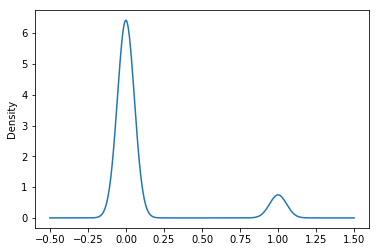

In [135]:
df.Securities_Account.plot.density()

Data is bi mode either 0 or 1. It can be classified as categorical variable. Most of the people don't have Securities Account

In [140]:
df[(df.Securities_Account==0) & (df.CreditCard==0)].CreditCard.value_counts()

0    3151
Name: CreditCard, dtype: int64

In [137]:
df[(df.Securities_Account==0) & (df.CreditCard==1)].CreditCard.value_counts()

1    1327
Name: CreditCard, dtype: int64

In [138]:
df[(df.Securities_Account==1) & (df.CreditCard==0)].CreditCard.value_counts()

0    379
Name: CreditCard, dtype: int64

In [139]:
df[(df.Securities_Account==1) & (df.CreditCard==1)].CreditCard.value_counts()

1    143
Name: CreditCard, dtype: int64

There is more probability that a person not having a security account will not have a credit card

In [141]:
df.CD_Account.value_counts()

0    4698
1     302
Name: CD_Account, dtype: int64

In [142]:
df[(df.CD_Account==0) & (df.CreditCard==0)].CreditCard.value_counts()

0    3468
Name: CreditCard, dtype: int64

In [143]:
df[(df.CD_Account==0) & (df.CreditCard==1)].CreditCard.value_counts()

1    1230
Name: CreditCard, dtype: int64

In [144]:
df[(df.CD_Account==1) & (df.CreditCard==0)].CreditCard.value_counts()

0    62
Name: CreditCard, dtype: int64

In [145]:
df[(df.CD_Account==1) & (df.CreditCard==1)].CreditCard.value_counts()

1    240
Name: CreditCard, dtype: int64

Form these value we get that there is high probability that if person is not having a CD account he will not have a credit card
and if he has CD account then also there is high probabilty that he will be having a Credit card.

In [157]:
df.Online.value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [158]:
df[(df.Online==0) & (df.CreditCard==0)].CreditCard.value_counts()

0    1428
Name: CreditCard, dtype: int64

In [160]:
df[(df.Online==0) & (df.CreditCard==1)].CreditCard.value_counts()

1    588
Name: CreditCard, dtype: int64

In [161]:
df[(df.Online==1) & (df.CreditCard==0)].CreditCard.value_counts()

0    2102
Name: CreditCard, dtype: int64

In [162]:
df[(df.Online==1) & (df.CreditCard==1)].CreditCard.value_counts()

1    882
Name: CreditCard, dtype: int64

Different value counts provide us different probabilities that whether a person is having a credit card

So here the EDA ends. We come to know different relation between different variables.

# Separation of target variable

In [7]:
feature_column=['Income','CD_Account','CCAvg','Age']  #these column can vary
x=df[feature_column]
y=df.CreditCard   #this is my target variable.

# Splitting the data set into train and test




In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

# Applying Decision Tree

In [9]:

clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

clf = clf.fit(x_train,y_train)


y_pred = clf.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.75


In [10]:
pd.crosstab(y_test,y_pred)

col_0,0,1
CreditCard,,
0,702,13
1,237,48


# Visualizing Tree

# Applying Random Forest

In [265]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)
model1=RandomForestClassifier(n_estimators=100,criterion='gini',random_state=50,
                               bootstrap = True,max_depth=3,
                               max_features = 'sqrt')
model1.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=50, verbose=0, warm_start=False)

In [266]:

y_pred1 = model1.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))


Accuracy: 0.721


In [267]:
pd.crosstab(y_test,y_pred1)

col_0,0,1
CreditCard,,
0,681,11
1,268,40


And here the code ends.


We have trained our model and its accuracy is 0.751.

Now as a bank I will always try to make some profit. So i will always try that a person who will be using Credit card often must get it in any case.
Person who will not be using credit card and got it will not be a big loss for a bank but if bank is not able to give a card to person who  mihgt have used it more then its a loss.

# Ends
